Hello everyone! The owner of a local library, Mr. James, is struggling during the pandemic and he wants us to find out the conditions which would make a book a best seller. In this project I will be finding out how different factors affect bestselling books.

**Note:** This dataset contains Amazon's Top 50 bestselling books from 2009 to 2019. This dataset contains 550 books, and the data has been categorized into fiction and non-fiction. 

<u>Fields:</u>
- Name (of the book)
- Author
- User Rating
- Reviews (number of reviews)
- Price (of the book)
- Year (the year(s) it ranked on the bestseller)
- Genre (fiction or non-fiction)

We will be answering three questions:

1. What is the range of prices for these bestselling books?
2. Does the genre of a book affect its user rating?
3. What are the top 10 authors with the highest rated books?


(Can skip) The following section is an introduction to the data.

There are 248 authors, but 550 entries.
In this dataset, Jeff Kinney wrote the most books (12 books).
                                                Name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     Author  User Rating  Reviews  Price  Year        Genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction  
      User Rating  Reviews  Price    Year
mean          4.6  11953.3   13.1  2014.0
min      

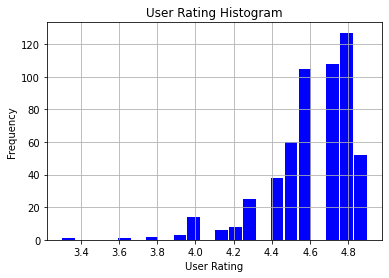

Text(0.5, 1.0, 'Price Histogram')

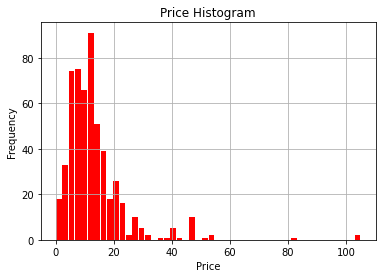

In [34]:
import pandas as pd
import matplotlib.pyplot as plt 

#loading my csv file into a dataframe
top50Books = pd.read_csv('bestsellers with categories.csv')

#INTRODUCTION TO THE DATA---

#number of authors
number_of_authors=len(top50Books['Author'].unique())
print(f'There are {number_of_authors} authors, but {len(top50Books)} entries.')

#trying to find which author wrote the most books
author=top50Books['Author'].value_counts()
print(f'In this dataset, {author.idxmax()} wrote the most books ({author.max()} books).')

#first 5 rows
print(top50Books.head()) 

# histograms for User Rating and Price
print(top50Books.describe().round(1).drop(['std','25%','50%','75%','count']))

top50Books['User Rating'].hist(
    grid=True,
    bins='auto',
    rwidth=0.9,
    color='blue'
)
plt.xlabel('User Rating')
plt.ylabel('Frequency')
plt.title('User Rating Histogram')
plt.show()

top50Books['Price'].hist(
    grid=True,
    bins='auto',
    rwidth=0.9,
    color='red'
)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Histogram')


Here we will be answering the first question: 
- What is the range of prices for these bestselling books?

This will help Mr. James when he is deciding what price to sell his books at. 

In the graph below, we can see a general cluster around the 20 mark on the y axis. This means majority of the books ranked on Amazon's Top 50 bestselling books were set at a price for about $20. 

**Suggestion:** Mr. James should sell his books somewhere from 21 dollars to 25 dollars (to get that extra money lol).

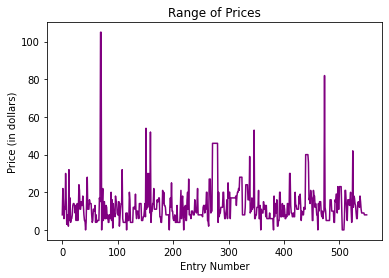

In [9]:
prices=list(top50Books.Price.values)

plt.plot(prices,color='purple')
plt.xlabel('Entry Number')
plt.ylabel('Price (in dollars)')
plt.title('Range of Prices')
plt.show()

Here we will be answering the second question:
- Does the genre of a book affect its user rating?

This will help Mr. James when he is deciding what genre of books to buy.

In the graph below, we can see the average rating for a best selling nonfiction book is .05 less (4.6) than the average rating for a best selling fiction book (4.65). 

**Suggestion:** Since there isn't a significant difference, Mr. James should restock with a variety of fiction and nonfiction books.

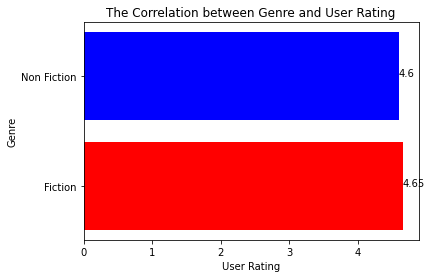

In [10]:
# fiction
fiction_books=top50Books[top50Books.Genre=='Fiction']
avg_ratingF = fiction_books['User Rating'].mean()

# non fiction
nonfiction_books=top50Books[top50Books.Genre=='Non Fiction']
avg_ratingNF = nonfiction_books['User Rating'].mean()

# plotting
genres=['Fiction','Non Fiction']
avg_rating=[avg_ratingF,avg_ratingNF]

plt.barh(genres,avg_rating,color=['red','blue'])
for index, value in enumerate(avg_rating):
    plt.text(value, index, str(round(value,2)))

plt.xlabel('User Rating')
plt.ylabel('Genre')
plt.title('The Correlation between Genre and User Rating')
plt.show()




Here we will be answering the third, and final question:
- What are the top 10 authors with the highest rated books?

This will help Mr. James to decide if he should purchase more books from a specific author(s).

By the output below, we can see the top 10 authors, who have an average user rating of 4.9. 

**Suggestion:** Since a lot of people like their works (as evidenced by the high rating), Mr. James should purchase a lot of books from these specific authors.


In [11]:
from tabulate import tabulate as tb

author_ratings=top50Books.groupby('Author')['User Rating'].mean().reset_index()
DF_sorted=author_ratings.sort_values(by='User Rating',ascending=False).reset_index(drop=True)
print(tb(DF_sorted.head(10)))


-  ---------------------  ---
0  Jill Twiss             4.9
1  Nathan W. Pyle         4.9
2  Chip Gaines            4.9
3  Rush Limbaugh          4.9
4  Bill Martin Jr.        4.9
5  Emily Winfield Martin  4.9
6  Pete Souza             4.9
7  Patrick Thorpe         4.9
8  Lin-Manuel Miranda     4.9
9  Sherri Duskey Rinker   4.9
-  ---------------------  ---


The analysis is done! Hopefully with the suggestions listed below, Mr. James can take actionable steps to increase business profit.

**Summary:**

1. Mr. James should sell his books for around the $20 range.

2. Mr. James should buy a variety of books, fiction or non-fiction.

3. Mr. James should consider buying from these authors:
- Jill Twiss 
- Nathan W. Pyle        
- Chip Gaines          
- Rush Limbaugh          
- Bill Martin Jr.        
- Emily Winfield Martin  
- Pete Souza            
- Patrick Thorpe        
- Lin-Manuel Miranda 
- Sherri Duskey Rinker 
as they have some of the highest user ratings.

Thank you for reading through this presentation! If you have any suggestions or concerns with my results please email: 
- hilooo122222@gmail.com